In [132]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
import pandas as pd

data = pd.read_excel("Data_Train.xlsx")

In [134]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [136]:
#check the missing value
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [137]:
# drop the missing values
data.dropna(inplace=True)

In [138]:
# convert the date of journey column into date time format
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y")

In [139]:
 data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [140]:
# extracting the day,month,year  from date of Journey
# data["Day"]=data["Date_of_Journey"].str.split("/").str[0]
data["Day"]=data["Date_of_Journey"].dt.day
data["Month"]=data["Date_of_Journey"].dt.month
data["Year"]=data["Date_of_Journey"].dt.year

In [141]:
data.drop("Date_of_Journey",axis=1,inplace=True)

In [142]:
data["Dep_hour"]=data["Dep_Time"].str.split(":").str[0].astype(int)
data["Dep_min"]=data["Dep_Time"].str.split(":").str[1].astype(int)


In [143]:
data.drop("Dep_Time",axis=1,inplace=True)

In [144]:
# first extract the arrival time and remove the day and month from the arrival time column# extr
data["Arrival_Time"]  = data["Arrival_Time"].str.split(" ").str[0]
data["Arrival_hour"] = data["Arrival_Time"].str.split(":").str[0].astype(int)
data["Arrival_min"]  = data["Arrival_Time"].str.split(":").str[1].astype(int)

In [145]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [146]:
#dropping Arrival_Time
data.drop("Arrival_Time",axis=1,inplace=True)

In [147]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [148]:
# extract the duration hour and duration min from the duration column
data['Duration_hour'] = data['Duration'].str.split(' ').str[0]
data['Duration_min'] = data['Duration'].str.split(' ').str[1]
 

In [149]:
# remove the 'h' and 'm' from the duration hour and duration min columns
data['Duration_hour'] = data['Duration_hour'].astype(str).str.extract(r'(\d+)', expand=False).fillna(0).astype(int)
data['Duration_min'] = data['Duration_min'].astype(str).str.extract(r'(\d+)', expand=False).fillna(0).astype(int)
 

In [150]:
#dropping Arrival_Time
data.drop("Duration",axis=1,inplace=True)

In [151]:
data.drop("Additional_Info",axis=1,inplace=True)

In [152]:
data['Total_Stops'] = data['Total_Stops'].astype(str).str.split(' ').str[0]
data['Total_Stops'] = data['Total_Stops'].replace('non-stop', 0).astype(int)

In [154]:
data["Total_Stops"].unique()

array([0, 2, 1, 3, 4])

In [ ]:
data["Total_Stops"].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [155]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,2019,16,50,21,35,4,45


In [156]:
data["Route"]=data["Route"].astype("str")

In [157]:
data["Route_1"] = data["Route"].str.split("→").str[0].str.strip().fillna("None")
data["Route_2"] = data["Route"].str.split("→").str[1].str.strip().fillna("None")
data["Route_3"] = data["Route"].str.split("→").str[2].str.strip().fillna("None")
data["Route_4"] = data["Route"].str.split("→").str[3].str.strip().fillna("None")
data["Route_5"] = data["Route"].str.split("→").str[4].str.strip().fillna("None")

In [158]:
data.drop("Route", axis=1, inplace=True)

In [159]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,BLR,NAG,DEL,None,None


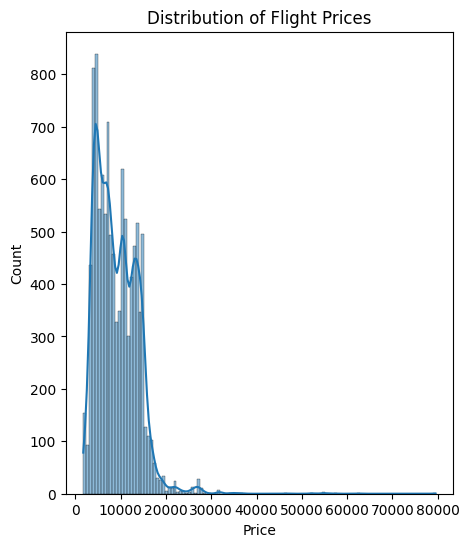

In [ ]:
# plot the distribution of the target variable

plt.figure(figsize=(5,6))

sns.histplot(data['Price'],kde=True)

plt.title('Distribution of Flight Prices')

plt.show()
 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot


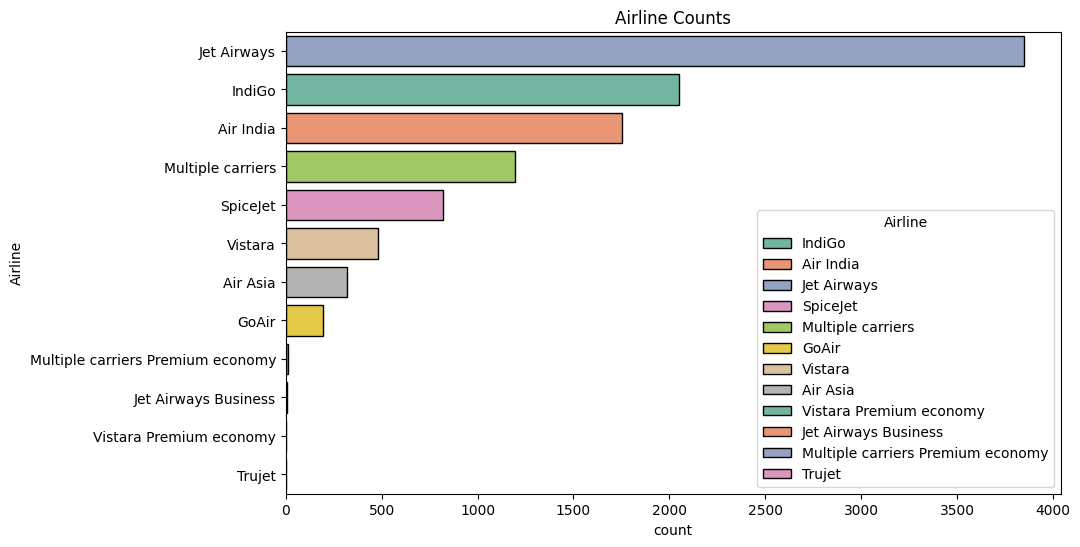

In [160]:
# plot the airline counts
plt.figure(figsize=(10, 6))
# make horizontal bar plot of airline counts
sns.countplot(y=data['Airline'], order=data['Airline'].value_counts().index,hue=data['Airline'],edgecolor='black',palette='Set2',dodge=False,legend=True)
plt.title('Airline Counts')
plt.show()
 

In [161]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_cols=data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897,24,3,2019,22,20,1,10,2,50,0,10,21,10,4
1,1,3,0,2,8,7662,1,5,2019,5,50,13,15,7,25,2,20,1,3,4
2,4,2,1,2,8,13882,9,6,2019,9,25,4,25,19,0,3,27,4,5,4
3,3,3,0,1,8,6218,12,5,2019,18,5,23,30,5,25,2,29,3,10,4
4,3,0,5,1,8,13302,1,3,2019,16,50,21,35,4,45,0,29,7,10,4


In [162]:
print("Mean:",data["Price"].mean())
print("Median:",data["Price"].median())
print("Mode:",data["Price"].mode())




Mean: 9087.21456656057
Median: 8372.0
Mode: 0    10262
Name: Price, dtype: int64


In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = data.drop("Price", axis=1)
y = data["Price"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Metrics
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression
MAE: 2297.1463390652007
MSE: 10801625.513111638
R2 Score: 0.49904474087623707


In [174]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Metrics
print("Decision Tree Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Decision Tree Regressor
MAE: 1319.6786258473219
MSE: 5070879.69125335
R2 Score: 0.7648239288953589


In [178]:
from sklearn.svm import SVR

# SVR
svr_model = SVR(kernel='rbf', C=200, gamma=0.05, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)

# Metrics
print("Support Vector Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Support Vector Regressor
MAE: 1853.2131745220024
MSE: 8967323.945466543
R2 Score: 0.584115549525857


In [175]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

# Metrics
print("K-Nearest Neighbors Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

K-Nearest Neighbors Regressor
MAE: 1437.20767430978
MSE: 5816165.113823117
R2 Score: 0.7302592560568679


In [177]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Metrics
print("Random Forest Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Random Forest Regressor
MAE: 1127.7432046702484
MSE: 4067632.153032202
R2 Score: 0.8113523083383222


In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --------------------------
# Features and target
# --------------------------
X = data.drop("Price", axis=1)
y = data["Price"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for KNN and SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# Define models
# --------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=10, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=200, gamma=0.05, epsilon=0.1)
}

# --------------------------
# Evaluate all models
# --------------------------
results = {}

for name, model in models.items():
    # Scale features for KNN and SVR
    if name in ['KNN','SVR']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# --------------------------
# Display results
# --------------------------
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print(results_df)

                           MAE           MSE        R2
Random Forest      1127.743205  4.067632e+06  0.811352
Decision Tree      1319.678626  5.070880e+06  0.764824
KNN                1437.207674  5.816165e+06  0.730259
SVR                1853.213175  8.967324e+06  0.584116
Linear Regression  2297.146339  1.080163e+07  0.499045


In [181]:
import joblib

# Suppose rf_model is your trained Random Forest model
rf_model.fit(X_train, y_train)  # make sure it’s trained

# Save the model to a file
joblib.dump(rf_model, "random_forest_model.pkl")
print("Random Forest model saved as 'random_forest_model.pkl'")

Random Forest model saved as 'random_forest_model.pkl'
